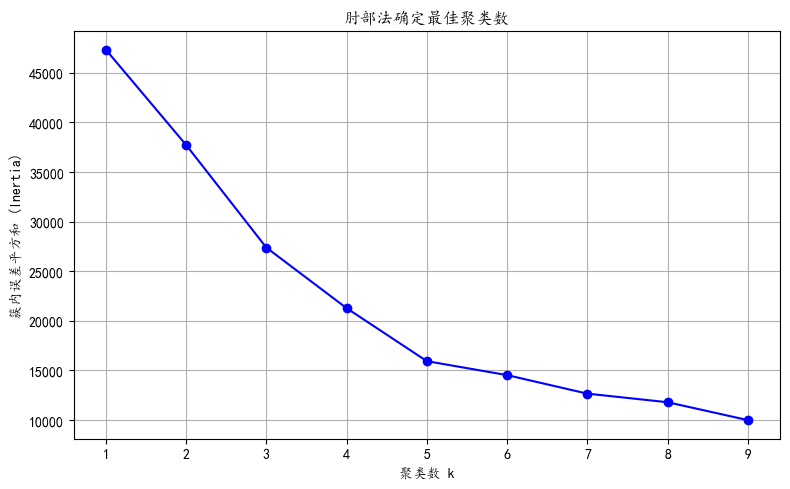

cluster
0    5277
4    2584
3    1463
1    1418
2    1091
Name: count, dtype: int64

各类的聚类中心（原始因子得分空间）：
   Factor 1  Factor 2  Factor 3  Factor 4
0 -0.429187  0.471943 -0.352288 -0.316915
1 -0.365810 -2.166729 -0.443836 -0.008252
2  0.178809  0.380041 -0.003733  2.816628
3 -0.412076 -0.023107  1.896894 -0.219500
4  1.233111  0.078113 -0.108816 -0.413067


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 设置中文字体为楷体，防止中文乱码
plt.rcParams['font.family'] = 'KaiTi'

# 1. 读取原始数据（包含因子得分）
df = pd.read_excel("二手汽车信息.xlsx", sheet_name='因子分析结果')

# 2. 取出用于聚类的因子得分列（确保列名正确）
factor_columns = ['动力性能因子', '新能源属性因子', '时效因子', '充电效率因子']
factor_scores = df[factor_columns].copy()

# 3. 标准化因子得分
scaler = StandardScaler()
X_scaled = scaler.fit_transform(factor_scores)

# 4. 使用肘部法选择聚类数 k
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=25)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 5. 绘制肘部图
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', markersize=6)
plt.xlabel('聚类数 k')
plt.ylabel('簇内误差平方和 (Inertia)')
plt.title('肘部法确定最佳聚类数')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. 选择最佳聚类数 k（例如为 5）
k = 5
kmeans = KMeans(n_clusters=k, random_state=25)
clusters = kmeans.fit_predict(X_scaled)

# 7. 将聚类结果添加到原始数据
df['cluster'] = clusters

# 8. 输出每类样本数量
print(df['cluster'].value_counts())

# 9. 保存带聚类标签的新表格
df.to_excel("聚类结果_加标签.xlsx", index=False)

# 10. 查看聚类中心（反标准化后）
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=factor_columns)
print("\n各类的聚类中心（原始因子得分空间）：")
print(centers_df)
